# w2v-модель 

In [3]:
import gensim

In [4]:
gensim.__version__

'3.8.0'

In [8]:
w2v = gensim.models.KeyedVectors.load_word2vec_format("182/model.bin",
                                                      binary=True)

In [11]:
w2v.get_vector('любовь_NOUN').shape

(300,)

In [12]:
w2v.most_similar(positive=['любовь_NOUN'], negative=['секс_NOUN'])

[('преданность_NOUN', 0.3810521960258484),
 ('доброта_NOUN', 0.37110236287117004),
 ('нежность_NOUN', 0.3703838586807251),
 ('неизречять_ADJ', 0.36475884914398193),
 ('всепрощающий_ADJ', 0.3636731505393982),
 ('любовь_ADJ', 0.36305347084999084),
 ('чувствомъ_PROPN', 0.3625626266002655),
 ('упование_NOUN', 0.35435524582862854),
 ('врность_NOUN', 0.35329458117485046),
 ('твердостие_NOUN', 0.3507946729660034)]

In [13]:
w2v.most_similar(positive=['питер_NOUN'], negative=['мост_NOUN'])

[('тегеран_NOUN', 0.27903908491134644),
 ('доследование_NOUN', 0.27679866552352905),
 ('магадан_NOUN', 0.2697596549987793),
 ('лас-вегас_NOUN', 0.26693931221961975),
 ('погостить_VERB', 0.26508599519729614),
 ('отпроситься_VERB', 0.2559608817100525),
 ('пришлем_NOUN', 0.2520972490310669),
 ('деннех_PROPN', 0.2509547770023346),
 ('пермь_NUM', 0.249786376953125),
 ('проведать_VERB', 0.2489762306213379)]

In [14]:
vocabulary = w2v.vocab

In [16]:
words = list(vocabulary.keys())
len(words)

248978

In [17]:
[item for item in words if item.split('_')[0] == 'год']

['год_NOUN', 'год_PROPN', 'год_NUM']

In [19]:
len(set([item.split('_')[0] for item in words]))

207788

In [22]:
import numpy as np
from tqdm import tqdm_notebook

uniq_words = ["#PAD#", "#UNK#"]
embedings = [np.zeros(300,), np.zeros(300,)]

for word in tqdm_notebook(words):
    cur_word = word.split('_')[0]
    if cur_word in uniq_words:
        continue 
        
    uniq_words.append(cur_word)
    embedings.append(w2v.get_vector(word))

In [30]:
expected_count = len(set([item.split('_')[0] for item in words]))
expected_count = expected_count + 2

In [31]:
embedings = np.stack(embedings)
embedings = embedings.astype(np.float32)

In [34]:
assert embedings.shape[0] == expected_count

In [35]:
np.save('embedings.npy', embedings)

In [36]:
word2indx = {word: idx for idx,word in enumerate(uniq_words)}

In [38]:
import pickle 

with open('vocab', 'wb') as f:
    pickle.dump(word2indx, f)

## Данные 

In [41]:
import pandas as pd
df = pd.read_csv('train_content.csv')
print(df.shape)
df.head()

(172913, 13)


,_id,date,tags,title,hubs_title,description,name,hub,png,nick,url,content,favs_lognorm
0,https://geektimes.ru/post/21866/,2008-03-17T18:55:00.000Z,"['eeepc', 'asus', 'ЭТО', 'эльдорадо', 'ура']",eeePC в продаже. Да. Правда.,Железо,"Итак, если 3 дня назад я отписался то что в пр...",Сергей 'pokatusher',hub/hardware,https://habrastorage.org/getpro/habr/olpicture...,@M_org,https://geektimes.ru/users/M_org,"Итак, если 3 дня назад я <a href=""http://habra...",2.484907
1,https://habrahabr.ru/company/aladdinrd/blog/30...,2016-06-24T13:02:00.000Z,"['Интеграция', 'шифрование', 'Windows', 'Win32...",«Разрубить Гордиев узел» или преодоление пробл...,Системное программирование,Современная операционная система это сложный и...,Аладдин Р.Д.,hub/system_programming,https://habrastorage.org/files/cbd/cf9/5ff/cbd...,NaN,https://habrahabr.ru/company/aladdinrd,Современная операционная система это сложный и...,4.174387
2,https://geektimes.ru/post/92887/,2010-05-06T10:00:00.000Z,"['mc', 'midnight commander', 'diffview', 'merg...",Релиз Midnight Commander 4.7.2 и 4.7.0.5,Чёрная дыра,Спустя 2 месяца упорных трудов вышла новая вер...,Илья Маслаков,hub/closet,https://geektimes.ru/images/logo.png,@smind,https://geektimes.ru/users/smind,Спустя 2 месяца упорных трудов вышла новая вер...,0.000000
3,https://habrahabr.ru/post/290824/,2015-05-22T11:01:00.000Z,"['бизнес-модель', 'бизнес-моделирование']",7 шагов для постройки правильной бизнес-модели,Интернет-маркетинг,Большинство IT предпринимателей сосредотачиваю...,Александр,hub/internetmarketing,https://habrastorage.org/files/50e/211/9a0/50e...,@jasiejames,https://habrahabr.ru/users/jasiejames,"<img src=""https://habrastorage.org/files/50e/2...",3.496508
4,https://habrahabr.ru/post/190088/,2014-09-04T00:32:00.000Z,"['python', 'flask', 'mongodb', 'pet-project']",Thunderargs: практика использования. Часть 2,Программирование,История создания Часть 1 Добрый день. Вкратце...,Данияр Супиев,hub/programming,https://habrahabr.ru/i/habralogo.jpg,@uthunderbird,https://habrahabr.ru/users/uthunderbird,"<a href=""http://habrahabr.ru/post/223041/"">Ист...",3.688879


In [59]:
df = df[(df.title.str.len() > 5)&(df.content.str.len() > 5)]

In [154]:
df.favs_lognorm.max()

9.080687163749312

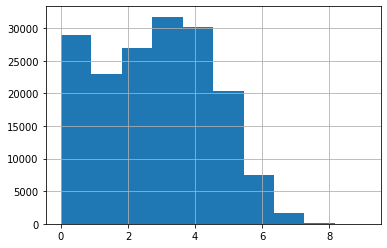

In [61]:
df.favs_lognorm.hist();

In [64]:
t = df.title.get_values()
c = df.content.get_values()

y = df.favs_lognorm.get_values()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


In [71]:
t[130]

'Как бесплатно отправлять push оповещение на iphone из своего скрипта c помощью Boxcar 2'

In [86]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def prepare_text(text, limit):
    text = re.sub('[^а-яa-z]', ' ', text.lower())
    clear_text = tokenizer.tokenize(text)
    clear_text = [word2indx.get(item,1) for item in clear_text]   
    if len(clear_text) < limit:
        clear_text += [0]*(limit - len(clear_text))
        
    return clear_text[:limit]
    

In [91]:
prepare_text(t[30],15)

[8350, 1, 1, 78285, 1, 1, 579, 11118, 3680, 8413, 10, 0, 0, 0, 0]

In [95]:
%%time
CONTENT_LEN = 400
TITLE_LEN = 10

X_title = [prepare_text(text, TITLE_LEN) for text in t[:1000]]
X_content = [prepare_text(text, CONTENT_LEN) for text in c[:1000]]
y = y[:1000]

CPU times: user 1.07 s, sys: 48.8 ms, total: 1.12 s
Wall time: 1.19 s


In [100]:
from sklearn.model_selection import train_test_split

X_ttrain, X_ttest, X_ctrain, X_ctest, \
    y_train, y_test = train_test_split(X_title, X_content, y,
                                       test_size = 0.2, random_state=42)

In [176]:
def batch_generator(X1, X2, y, batch_size):
    max_range = y.size//batch_size 
    for i in range(max_range):
        yield X1[i*batch_size: min(y.size, (i+1)*batch_size)], \
              X2[i*batch_size: min(y.size, (i+1)*batch_size)], \
               y[i*batch_size: min(y.size, (i+1)*batch_size)]

# Архитектура

In [114]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [123]:
title = tf.placeholder(name='title', shape=[None, TITLE_LEN], \
                          dtype=tf.int64)

content = tf.placeholder(name='content', shape=[None, CONTENT_LEN], \
                          dtype=tf.int64)

target = tf.placeholder(name='target', shape=[None], \
                          dtype=tf.float32)

title, content, target

(<tf.Tensor 'title_7:0' shape=(?, 10) dtype=int64>,
 <tf.Tensor 'content_6:0' shape=(?, 400) dtype=int64>,
 <tf.Tensor 'target:0' shape=(?,) dtype=float32>)

In [209]:
import keras
import keras.backend as K

def reset_tf_session():
    curr_session = tf.get_default_session()
    
    # close current session
    if curr_session is not None:
        curr_session.close()
        
    # reset graph
    K.clear_session()
    
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

s = reset_tf_session()

In [128]:
# подгрузили эмбединги
word_embeddings_pretrained = np.load("embedings.npy")

word_embeddings_placeholder = tf.placeholder(tf.float32, \
                            shape=word_embeddings_pretrained.shape)

word_embeddings = tf.Variable(word_embeddings_placeholder,
                              name="word_embeddings",
                              trainable=False)

# инициализируем эмбединги нашими векторами
s.run(tf.variables_initializer([word_embeddings]),
feed_dict={word_embeddings_placeholder: word_embeddings_pretrained})

print(word_embeddings_pretrained.shape)

(207790, 300)


In [134]:
title_emb = tf.nn.embedding_lookup(word_embeddings, title)
content_emb = tf.nn.embedding_lookup(word_embeddings, content)

title_emb = tf.reduce_mean(title_emb, axis=1)
content_emb = tf.reduce_mean(content_emb, axis=1)

title_emb, content_emb

(<tf.Tensor 'Mean_5:0' shape=(?, 300) dtype=float32>,
 <tf.Tensor 'Mean_6:0' shape=(?, 300) dtype=float32>)

In [138]:
emb = tf.concat([title_emb, content_emb], axis=1)
emb

<tf.Tensor 'concat_2:0' shape=(?, 600) dtype=float32>

In [140]:
fc_layer_1 = tf.layers.Dense(32, activation=tf.nn.elu)
fc_layer_2 = tf.layers.Dense(16, activation=tf.nn.elu)

In [142]:
emb = fc_layer_1(emb)
emb

W0815 20:20:46.862153 140736525820864 deprecation.py:506] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<tf.Tensor 'dense/Elu:0' shape=(?, 32) dtype=float32>

In [143]:
emb = fc_layer_2(emb)
emb

<tf.Tensor 'dense_1/Elu:0' shape=(?, 16) dtype=float32>

In [145]:
pre_output_layer = tf.layers.Dense(1)
pre_output = pre_output_layer(emb)
pre_output

<tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 1) dtype=float32>

In [156]:
output_layer = tf.multiply(tf.sigmoid(pre_output),10)
output_layer

<tf.Tensor 'Mul:0' shape=(?, 1) dtype=float32>

In [149]:
result = []
for layer in [fc_layer_1, fc_layer_2, pre_output_layer]:
    result.extend(layer.trainable_variables)

result

[<tf.Variable 'dense/kernel:0' shape=(600, 32) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(32, 16) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(16, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [150]:
s.run(tf.variables_initializer(result))

In [152]:
ex_t = X_ttrain[0:1]
ex_c = X_ctrain[0:1]

ex_t

[[1, 1948, 1, 32322, 898, 1, 1, 1, 0, 0]]

In [157]:
pre_output.eval({title: ex_t, content:ex_c})

array([[-0.00292445]], dtype=float32)

In [158]:
output_layer.eval({title: ex_t, content:ex_c})

array([[4.992689]], dtype=float32)

# Обучение

In [161]:
loss = tf.reduce_mean(tf.square(output_layer - target))
loss

<tf.Tensor 'Mean_9:0' shape=() dtype=float32>

In [162]:
loss.eval({title: ex_t, content:ex_c, target: [8]})

9.043919

In [177]:
optimizer = tf.train.AdamOptimizer(1e-3, name="adam")
step = optimizer.minimize(loss)
s.run(tf.variables_initializer(optimizer.variables()))

In [207]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

EPOCHS = 5
BATCH_SIZE = 100

for i in range(EPOCHS):
    
    batch_losses = [ ]
    
    train_batch_gen =batch_generator(X_ttrain, X_ctrain,\
                                     y_train, BATCH_SIZE)

    test_batch_gen =batch_generator(X_ttest, X_ctest,\
                                     y_test, BATCH_SIZE)

    for X1,X2,y1 in train_batch_gen:
        
        s.run(step, feed_dict={title: X1, 
                               content: X2, 
                               target: y1})
        
        batch_loss = s.run(loss, feed_dict={title: X1, 
                                            content: X2, 
                                            target: y1})
        batch_losses.append(batch_loss)
        
    # тесовая выборка 
    y_predict = s.run(output_layer, feed_dict={title: X_ttest, 
                                              content: X_ctest})
        
        
    y_predict = np.array(y_predict).T[0]
    print('train loss:', np.mean(batch_losses))
    print('test loss:', mean_squared_error(y_test, y_predict), '\n')

train loss: 2.9512467
test loss: 2.7649960740965787 

train loss: 2.9510746
test loss: 2.7651204940707133 

train loss: 2.950904
test loss: 2.7652417553137276 

train loss: 2.9507356
test loss: 2.765358585578183 

train loss: 2.9505696
test loss: 2.7654707412426673 



In [202]:
y_predict[:5]

array([[2.8922563],
       [2.688756 ],
       [2.9825091],
       [2.9770713],
       [2.7896304]], dtype=float32)

In [200]:
y_test[:5]

array([3.04452244, 1.60943791, 4.26267988, 0.        , 3.21887582])

In [1]:
import numpy as np

In [4]:
1/(1 + np.exp(1))

0.2689414213699951